In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
input_data_path = "../data/"
last = pd.read_csv(input_data_path + "data_last.csv")
sector = pd.read_csv(input_data_path + "data_sector.csv")
volume = pd.read_csv(input_data_path + "data_volume.csv")
mkt_cap = pd.read_csv(input_data_path + "data_mkt_cap.csv")

daily_info = [last, mkt_cap, volume]

stock_info = reduce(lambda left, right: pd.merge(left, right, left_on=['date', 'ticker'], right_on=['date', 'ticker'], how='inner'), daily_info)
stock_info = stock_info.merge(sector, left_on=['ticker'], right_on=['ticker'], how='inner')

/tmp/ipykernel_3437/1498350522.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_index = stock_info.groupby("date").apply(lambda x: np.sum(x["last"]*x["weight"]))
/tmp/ipykernel_3437/1498350522.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  one_day_last = float(stock_index[stock_index["date"] == "2020-01-06"]["last"])


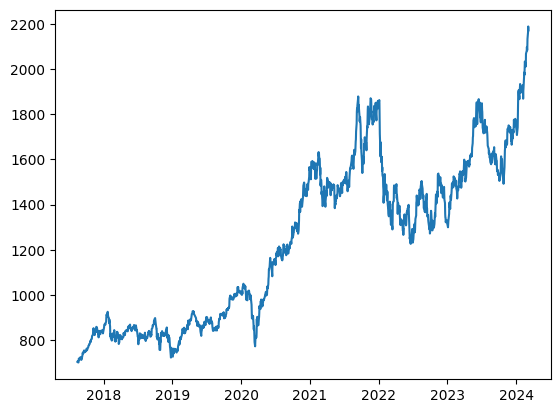

In [3]:
stock_info["weight"] = stock_info["mkt_cap"] / stock_info.groupby("date")["mkt_cap"].transform("sum")

stock_index = stock_info.groupby("date").apply(lambda x: np.sum(x["last"]*x["weight"]))
stock_index = pd.DataFrame(stock_index, columns=["last"])
stock_index["date"] = stock_index.index
stock_index.index = range(len(stock_index))

one_day_last = float(stock_index[stock_index["date"] == "2020-01-06"]["last"])
stock_index["last"] = stock_index["last"] / one_day_last * 1000
stock_index["date"] = pd.to_datetime(stock_index["date"], format='%Y-%m-%d')

fig, ax = plt.subplots()
ax.plot(stock_index["date"], stock_index["last"])
plt.show()

In [4]:
stock_info["difference"] = stock_info.groupby("ticker")["last"].diff()
stock_info_one_month = stock_info[stock_info["date"] >= "2021-01-01"]
stock_info_one_month = stock_info_one_month[stock_info_one_month["date"] <= "2021-01-31"]
stock_info_one_month["contrib"] = stock_info_one_month["weight"] * stock_info_one_month["difference"]

positive_5_of_each_day = stock_info_one_month.groupby("date").apply(lambda x: x.nlargest(5, "contrib"))["ticker"]
negative_5_of_each_day = stock_info_one_month.groupby("date").apply(lambda x: x.nsmallest(5, "contrib"))["ticker"]

print("Positive 5: \n", positive_5_of_each_day)
print("Negative 5: \n", negative_5_of_each_day)

Positive 5: 
 date              
2021-01-04  26406     2413 JT
            229479    6758 JT
            213489    6594 JT
            285444    7741 JT
            184707    6273 JT
                       ...   
2021-01-29  285462    7741 JT
            219903    6702 JT
            115968    4661 JT
            229497    6758 JT
            355818    8801 JT
Name: ticker, Length: 95, dtype: object
Negative 5: 
 date              
2021-01-04  240672    6861 JT
            418161    9983 JT
            307830    8035 JT
            419760    9984 JT
            115950    4661 JT
                       ...   
2021-01-29  240690    6861 JT
            184725    6273 JT
            213507    6594 JT
            307848    8035 JT
            195918    6367 JT
Name: ticker, Length: 95, dtype: object


/tmp/ipykernel_3437/576943488.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positive_5_of_each_day = stock_info_one_month.groupby("date").apply(lambda x: x.nlargest(5, "contrib"))["ticker"]
/tmp/ipykernel_3437/576943488.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  negative_5_of_each_day = stock_info_one_month.groupby("date").apply(lambda x: x.nsmallest(5, "contrib"))["ticker"]


/tmp/ipykernel_3437/1920139079.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group["difference"], shade=True, ax=ax)
/tmp/ipykernel_3437/1920139079.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group["difference"], shade=True, ax=ax)
/tmp/ipykernel_3437/1920139079.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group["difference"], shade=True, ax=ax)
/tmp/ipykernel_3437/1920139079.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group["difference"], shade=True, ax=ax)
/tmp/ipykern

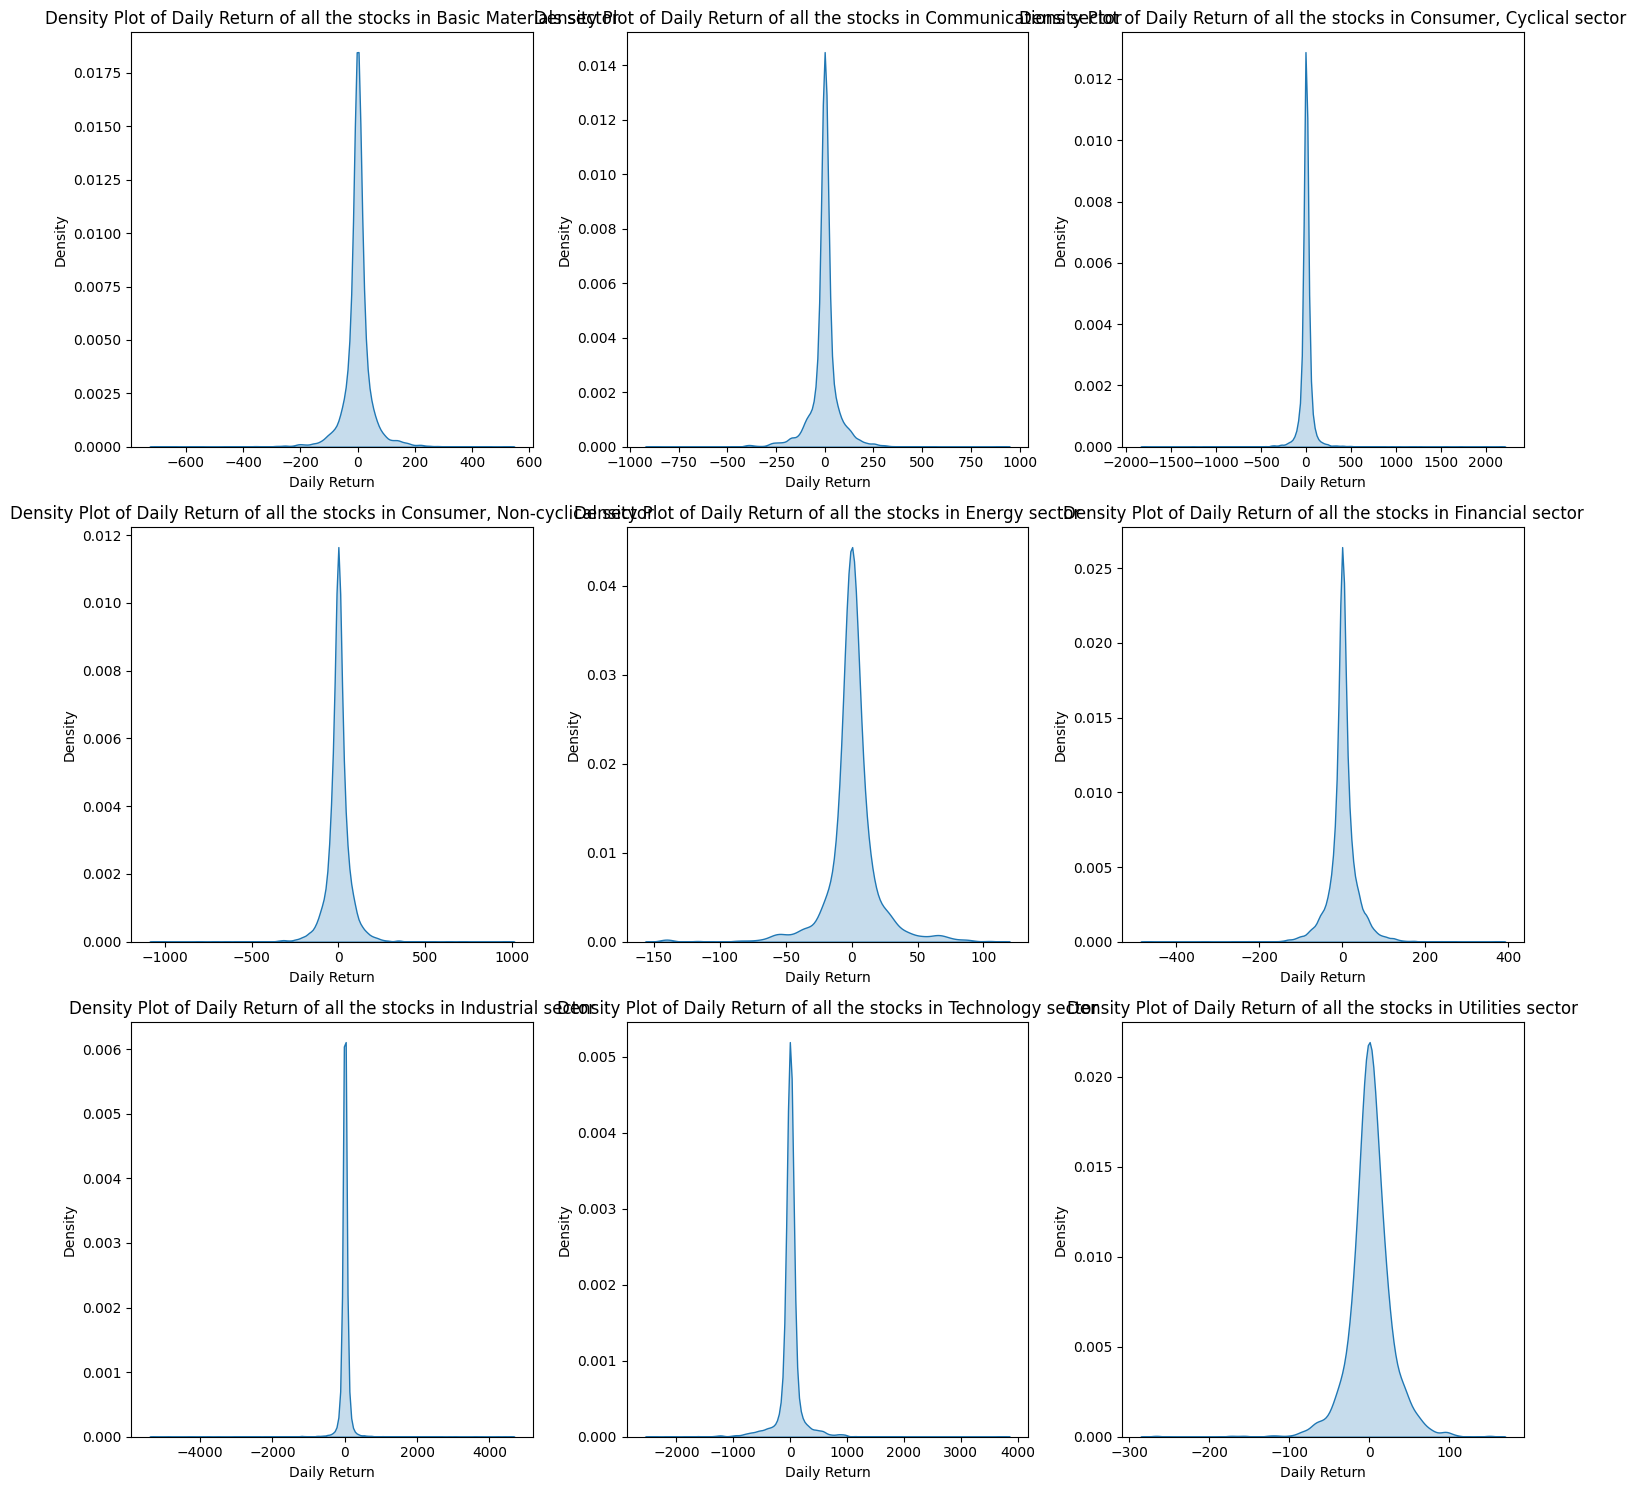

In [5]:
stock_info_one_year = stock_info[stock_info["date"] >= "2022-01-01"]
stock_info_one_year = stock_info_one_year[stock_info_one_year["date"] <= "2022-12-31"]
stock_info_one_year_groupBy_sector = stock_info_one_year.groupby("bics_sector")
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for (name, group), ax in zip(stock_info_one_year_groupBy_sector, axs.flatten()):
    mean = group["difference"].sum() / int(group["difference"].count())
    sns.kdeplot(group["difference"], shade=True, ax=ax)
    ax.set_title(f'Density Plot of Daily Return of all the stocks in {name} sector')
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()